In [1]:
from olfactometer_ingestion import create_device, populate_software_events
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [2]:
TARGET_PATH = Path(r"C:\Users\huy.nguyen\Downloads\20240301T160321 1\20240301T160321")
OLFACTOMETER = create_device("Olfactometer")
ANALOG_INPUT = create_device("AnalogInput")
SOFTWARE_EVENTS = populate_software_events(root_path=TARGET_PATH)

In [3]:
endValve = OLFACTOMETER.EndValveState.read(TARGET_PATH/"Olfactometer.harp/Register__EndValveState.bin")
endValve

,EndValve0,EndValve1,ValveDummy
Time,,,
681743.391488,False,False,False
681743.461504,False,False,False
681758.408480,True,False,False
681760.412480,False,False,False
681770.422496,True,False,False
...,...,...,...
682243.922496,True,False,False
682243.924480,True,False,False
682369.072480,False,False,False


In [4]:
end_valve_rising_edges = endValve["EndValve0"].loc[endValve["EndValve0"].astype(float).diff() == 1.0]
end_valve_rising_edges.head(10)

Time
681758.408480    True
681770.422496    True
681782.435488    True
681794.456480    True
681806.473504    True
681818.484576    True
681830.498496    True
681842.512480    True
681854.524576    True
681866.533504    True
Name: EndValve0, dtype: bool

In [5]:
end_valve_crashing_edges = endValve["EndValve0"].loc[endValve["EndValve0"].astype(float).diff() == -1.0]
end_valve_crashing_edges.head(10)

Time
681760.412480    False
681772.423488    False
681784.446496    False
681796.458496    False
681808.474496    False
681820.487488    False
681832.500480    False
681844.514496    False
681856.526496    False
681868.534496    False
Name: EndValve0, dtype: bool

In [6]:
analog = ANALOG_INPUT.AnalogData.read(TARGET_PATH/"AnalogInput.harp/Register__33.bin")["Channel0"]


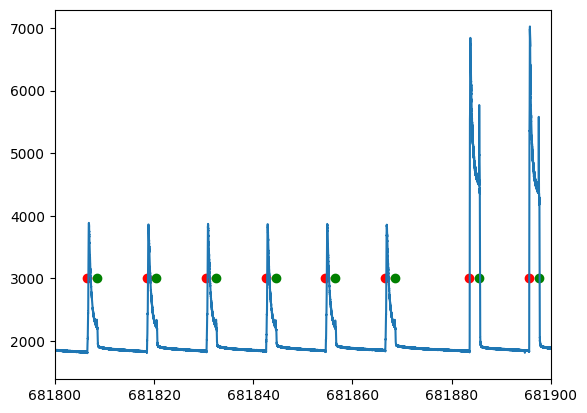

In [7]:

plt.figure()
plt.plot(analog)
plt.scatter(end_valve_rising_edges.index, np.ones_like(end_valve_rising_edges.index) * 3000, c="r") 
plt.scatter(end_valve_crashing_edges.index, np.ones_like(end_valve_crashing_edges.index) * 3000, c="g") 
plt.xlim((681800, 681900))
plt.show()

In [8]:
odor_config = SOFTWARE_EVENTS["OdorConfig"]["data"]
odor_config

Seconds
681743.392000    {'channel_index': 2, 'odorant': 'AmylAcetate',...
681868.532992    {'channel_index': 1, 'odorant': 'AlphaPinene',...
681993.658976    {'channel_index': 0, 'odorant': 'Eugenol', 'od...
682118.772992    {'channel_index': 2, 'odorant': 'AmylAcetate',...
682243.917984    {'channel_index': 1, 'odorant': 'AlphaPinene',...
682369.069984    {'channel_index': 0, 'odorant': 'Eugenol', 'od...
Name: data, dtype: object

In [9]:
channel_index = []
odorant = []
for i in range(len(odor_config)):
    val_chan = odor_config.iloc[i]["channel_index"]
    val_odo = odor_config.iloc[i]["odorant"]
    
    channel_index.append(val_chan)
    odorant.append(val_odo)

In [10]:
odo_info = pd.DataFrame(
    {
        'channel_index': channel_index,
        'odorant': odorant
    },
    index = odor_config.index
)
odo_info

,channel_index,odorant
Seconds,,
681743.392000,2,AmylAcetate
681868.532992,1,AlphaPinene
681993.658976,0,Eugenol
682118.772992,2,AmylAcetate
682243.917984,1,AlphaPinene
682369.069984,0,Eugenol


In [11]:
analog = pd.DataFrame(analog)
analog['odo_name'] = ''

analog

,Channel0,odo_name
Time,,
681742.376992,1673,
681742.377984,1674,
681742.378976,1676,
681742.380000,1676,
681742.380992,1670,
...,...,...
682494.202976,2532,
682494.204000,2531,
682494.204992,2536,


In [12]:
analog['odo_name'][analog.index < odo_info.index[0]] = "No Odor"
analog['odo_name'][analog.index >= odo_info.index[0]] = odo_info['odorant'].iloc[0]
analog['odo_name'][analog.index >= odo_info.index[1]] = odo_info['odorant'].iloc[1]
analog['odo_name'][analog.index >= odo_info.index[2]] = odo_info['odorant'].iloc[2]
analog['odo_name'][analog.index >= odo_info.index[3]] = odo_info['odorant'].iloc[3]
analog['odo_name'][analog.index >= odo_info.index[4]] = odo_info['odorant'].iloc[4]
analog['odo_name'][analog.index >= odo_info.index[5]] = odo_info['odorant'].iloc[5]

C:\Users\huy.nguyen\AppData\Local\Temp\ipykernel_10836\1731252584.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  analog['odo_name'][analog.index < odo_info.index[0]] = "No Odor"
C:\Users\huy.nguyen\AppData\Local\Temp\ipykernel_10836\173

In [13]:
analog

,Channel0,odo_name
Time,,
681742.376992,1673,No Odor
681742.377984,1674,No Odor
681742.378976,1676,No Odor
681742.380000,1676,No Odor
681742.380992,1670,No Odor
...,...,...
682494.202976,2532,Eugenol
682494.204000,2531,Eugenol
682494.204992,2536,Eugenol


In [14]:
baseline = end_valve_rising_edges.index[0]

#First part only
#end_valve_rising_edges = end_valve_rising_edges[end_valve_rising_edges.index < 681900]
#end_valve_crashing_edges = end_valve_crashing_edges[end_valve_crashing_edges.index < 681900]
#analog = analog[analog.index < 681900]
analog = analog[analog.index >= baseline]

In [15]:
end_valve_rising_edges.index =  end_valve_rising_edges.index - baseline
end_valve_crashing_edges.index =  end_valve_crashing_edges.index - baseline
analog.index = analog.index - baseline

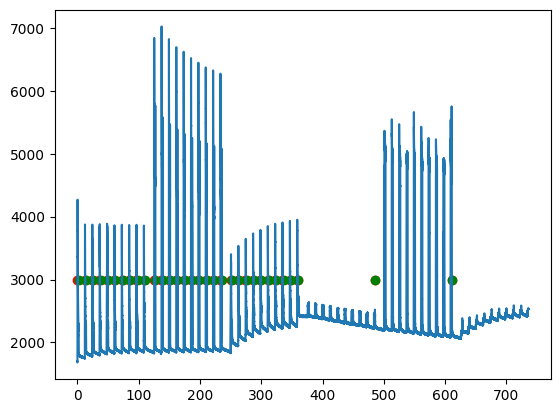

In [16]:
plt.figure()
plt.plot(analog.index, analog['Channel0'])
plt.scatter(end_valve_rising_edges.index, np.ones_like(end_valve_rising_edges.index) * 3000, c="r") 
plt.scatter(end_valve_crashing_edges.index, np.ones_like(end_valve_crashing_edges.index) * 3000, c="g")
plt.show()

In [18]:

analog_index_normalized = []
#FIXME: change index_pos
index_pos = len(end_valve_rising_edges.index) - 1

for i in reversed(analog.index):
    if i > end_valve_rising_edges.index[index_pos]:
        delta = i - end_valve_rising_edges.index[index_pos]
        analog_index_normalized.append(delta)
    else:
        delta = i - end_valve_rising_edges.index[index_pos - 1]
        analog_index_normalized.append(delta)
        index_pos -= 1
        
analog_index_normalized.reverse()

In [19]:
norm_analog = analog.copy()
norm_analog["nu_index"] = analog_index_normalized
norm_analog

,Channel0,odo_name,nu_index
Time,,,
0.000512,1699,AmylAcetate,0.000512
0.001504,1700,AmylAcetate,0.001504
0.002496,1705,AmylAcetate,0.002496
0.003520,1706,AmylAcetate,0.003520
0.004512,1699,AmylAcetate,0.004512
...,...,...,...
735.794496,2532,Eugenol,125.128480
735.795520,2531,Eugenol,125.129504
735.796512,2536,Eugenol,125.130496


In [20]:
norm_analog.to_csv(r"C:\Users\huy.nguyen\Documents\AIND Services\temp.csv")

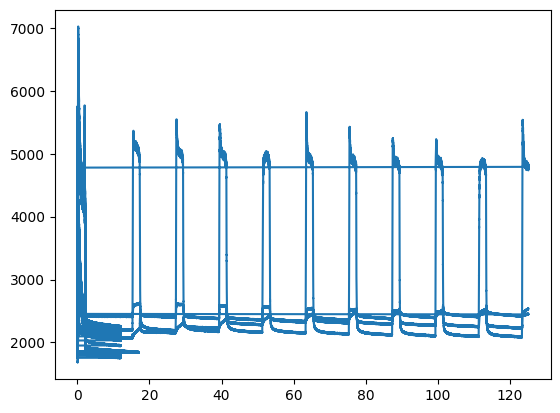

In [21]:
plt.figure()
plt.plot(norm_analog['nu_index'], norm_analog['Channel0'])
plt.show()

In [22]:
#sns.lineplot(data = norm_analog, x = 'nu_index', y = 'Channel0', hue = 'odo_name')